In [183]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# load dataset
from sklearn.datasets import load_digits 

In [184]:
# MNSIT Digits Dataset
digits = load_digits()

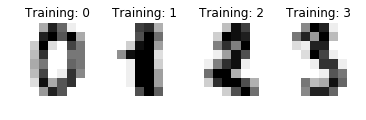

In [185]:
#Show sample images
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [207]:
#training procedure
def train(images):
    #initialize random output layer weight matrix
    output_layers = [np.random.randint(low=0,high=225, size=np.shape(images_and_labels[0][0])) for _ in range(10)]
    # for each image in training set
#     print(len(images))
    for image in images:
        # stack the input layer 10 times to create (10,8,8) ndarray similar to shape of output layer weight matrix.
        # this becomes input 
        c = np.dstack([image[0].T]*10).transpose()
        # multiply the output and input layer and sum on 1st axis twice to get sum for all nodes in output layer
        # find max to get the predicted node
        predicted_class = np.argmax(np.sum(np.sum(output_layers*c,axis=1),axis=1))
        actual_class = image[1]
        # update weights
        output_layers[predicted_class] = output_layers[predicted_class] - image[0]
        output_layers[actual_class]  = output_layers[actual_class] + image[0]
    for index, image in enumerate(output_layers):
        plt.subplot(5, 10, index + 1)
        plt.axis('off')
        plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('%i' % index)
    return output_layers

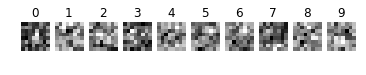

In [208]:
final_op_layer = train(images_and_labels)

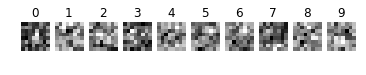

In [209]:
for index, image in enumerate(final_op_layer):
    plt.subplot(5, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % index)

# We Observe that the final output layers are taking a basic shape of the digits, as shown in the course. 
# Using a 32*32 dimension image will result in a better result